In [6]:
import pandas as pd
from barplots import barplots
import shutil
import os

In [7]:
df = pd.read_csv("approximated_walks.csv")
df["Max Neighbours"] = [
    "Approx. RW" if val == 10 else "Exact RW"
    for val in df["Max Neighbours"].values
]
df

,run_type,embedding_model,Max Neighbours,loss,accuracy,recall,precision,AUROC,AUPRC,f1_score,balanced_accuracy,specificity,miss_rate,fall_out,mcc
0,train,SkipGram,Approx. RW,0.138543,0.959360,0.957315,0.961246,0.990891,0.990033,0.959276,0.959360,0.961405,0.042685,0.038595,0.918727
1,test,SkipGram,Approx. RW,0.154127,0.955079,0.948909,0.960765,0.988614,0.988562,0.954800,0.955079,0.961249,0.051091,0.038751,0.910227
2,train,SkipGram,Exact RW,0.128985,0.959916,0.979582,0.942511,0.992166,0.991439,0.960689,0.959916,0.940250,0.020418,0.059750,0.920543
3,test,SkipGram,Exact RW,0.142512,0.955344,0.970652,0.941816,0.990065,0.990073,0.956017,0.955344,0.940035,0.029348,0.059965,0.911115
4,train,SkipGram,Approx. RW,0.138089,0.959748,0.958748,0.960670,0.990756,0.989956,0.959708,0.959748,0.960749,0.041252,0.039251,0.919498
5,test,SkipGram,Approx. RW,0.149447,0.956751,0.952488,0.960678,0.988912,0.988763,0.956566,0.956751,0.961014,0.047512,0.038986,0.913535
6,train,SkipGram,Exact RW,0.134219,0.959881,0.955537,0.963910,0.991721,0.991061,0.959706,0.959881,0.964224,0.044463,0.035776,0.919796
7,test,SkipGram,Exact RW,0.147796,0.956307,0.947992,0.964024,0.989704,0.989859,0.955941,0.956307,0.964622,0.052008,0.035378,0.912741
8,train,SkipGram,Approx. RW,0.127229,0.960364,0.978312,0.944411,0.992042,0.990965,0.961062,0.960364,0.942415,0.021688,0.057585,0.921321
9,test,SkipGram,Approx. RW,0.140014,0.956744,0.970079,0.944878,0.989939,0.989512,0.957313,0.956744,0.943408,0.029921,0.056592,0.913812


In [8]:
from scipy.stats import wilcoxon
results = []

for metric in df.columns[4:]:
    first = df[df.run_type == "test"][df["Max Neighbours"] == "Max"][metric]
    second = df[df.run_type == "test"][df["Max Neighbours"] == "10"][metric]
    statistic, p_value = wilcoxon(first, second)
    results.append({
        "Metric": metric,
        "P-value": p_value,
        "Statistic": statistic,
        "Mean Max": first.mean(),
        "STD Max": first.std(),
        "Mean 10": second.mean(),
        "STD 10": second.std()
    })
results = pd.DataFrame(results).T
new_header = results.iloc[0] #grab the first row for the header
results = results[1:] #take the data less the header row
results.columns = new_header #set the header row as the df header
table_results = results[["accuracy", "AUROC", "AUPRC", "f1_score"]]
display(table_results)
print(table_results.to_latex(float_format="{:0.3f}".format))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ValueError: zero_method 'wilcox' and 'pratt' do not work if the x - y is zero for all elements.

Rendering barplots:   0%|          | 0/4 [00:00<?, ?it/s]

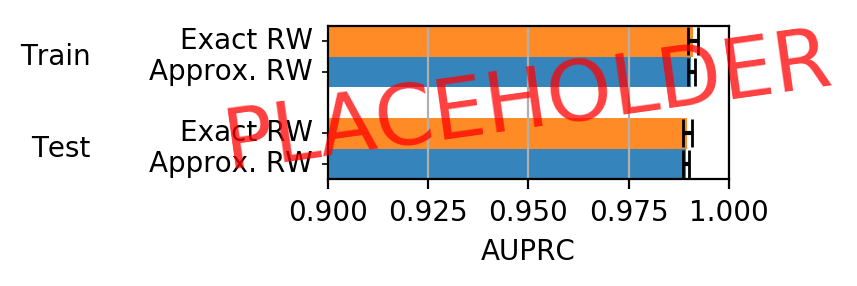

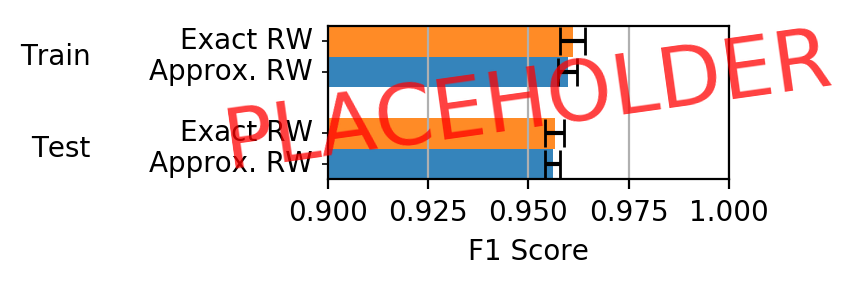

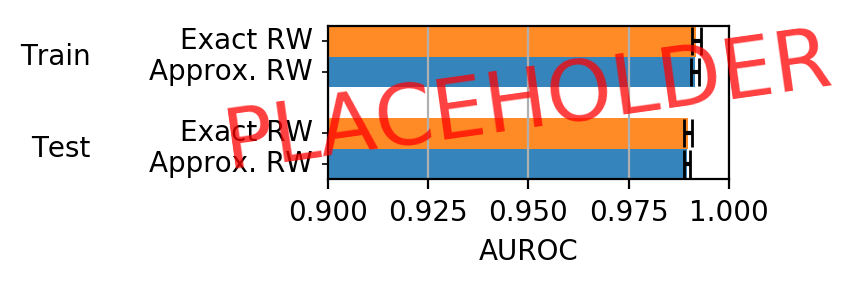

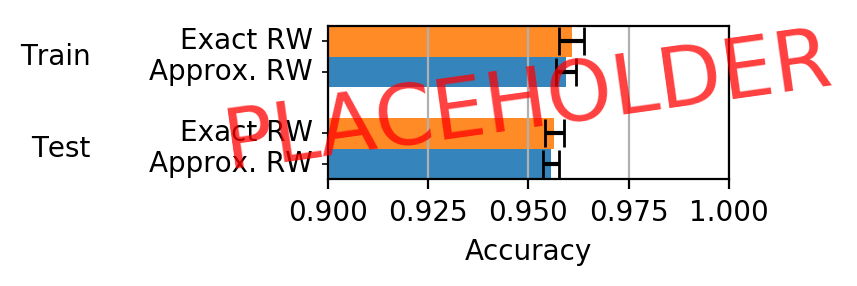

In [10]:
if os.path.exists("barplots"):
    shutil.rmtree("barplots")
index = ["run_type", "Max Neighbours"]
_ = barplots(
    df[index+["accuracy", "AUROC", "AUPRC", "f1_score"]],
    groupby=index,
    min_value=0.9,
    max_value=1.0,
    show_legend=False,
    #legend_position="center left",
    height=4,
    orientation="horizontal",
    show_title=False,
    placeholder=True
)